In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = { 'Country': [
         'Output, Q', 'Labour, L', 'Capital, K'
        ],
        'B':[
            80, 60, 50
        ],
        'C':[
            150, 100, 100
        ],
        'D':[
            135, 100, 80
        ],
        'E':[
            165, 120, 100
        ]  ,      
        'F':[
            95, 70, 60
        ],
        'G':[
            130,90,80
        ],
        'H':[
            110, 80, 70
        ]
       }
national = pd.DataFrame(data, columns = [
         'Country', 'B','C', 'D', 'E', 'F', 'G', 'H'
        ],
    index=[ 'Output, Q', 'Labour, L', 'Capital, K']
        )
national

,Country,B,C,D,E,F,G,H
"Output, Q","Output, Q",80,150,135,165,95,130,110
"Labour, L","Labour, L",60,100,100,120,70,90,80
"Capital, K","Capital, K",50,100,80,100,60,80,70


In [3]:
national.mean(axis = 1)

Output, Q     123.571429
Labour, L      88.571429
Capital, K     77.142857
dtype: float64

In [4]:
national.var(axis = 1)

Output, Q     914.285714
Labour, L     414.285714
Capital, K    357.142857
dtype: float64

In [5]:
national.std(axis = 1)

Output, Q     30.237158
Labour, L     20.354010
Capital, K    18.898224
dtype: float64

In [6]:
national.median(axis = 1)

Output, Q     130.0
Labour, L      90.0
Capital, K     80.0
dtype: float64

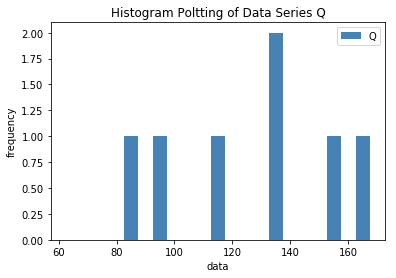

In [7]:
# set data
x_data = [60,70,80,90,100,110,120,130,140,150,160,170]
Q_data = [80,150,135,165,95,130,110]

# plot setting
bar_width=0.5
plt.hist(Q_data, x_data, histtype='bar', label='Q', rwidth=bar_width, color='steelblue')

# set labels for plotting
plt.title("Histogram Poltting of Data Series Q")
plt.xlabel("data")
plt.ylabel("frequency")
plt.legend()

plt.show()

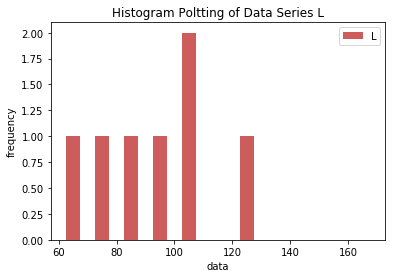

In [8]:
# set data
x_data = [60,70,80,90,100,110,120,130,140,150,160,170]
L_data = [60,100,100,120,70,90,80]

# plot setting
bar_width=0.5
plt.hist(L_data, x_data, histtype='bar', label='L', rwidth=bar_width, color='indianred')

# set labels for plotting
plt.title("Histogram Poltting of Data Series L")
plt.xlabel("data")
plt.ylabel("frequency")
plt.legend()

plt.show()

In [9]:
data = pd.read_csv("nationall.csv")
data.head()

,Country,Q,L,K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60


In [19]:
data['logQ']= np.log(data['Q']) 

In [20]:
data['logL']= np.log(data['L'])

In [21]:
data['logK']= np.log(data['K'])

In [22]:
data

,Country,Q,L,K,logQ,logL,logK
0,B,80,60,50,4.382027,4.094345,3.912023
1,C,150,100,100,5.010635,4.605170,4.605170
2,D,135,100,80,4.905275,4.605170,4.382027
3,E,165,120,100,5.105945,4.787492,4.605170
4,F,95,70,60,4.553877,4.248495,4.094345
5,G,130,90,80,4.867534,4.499810,4.382027
6,H,110,80,70,4.700480,4.382027,4.248495


In [36]:
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.iloc[:,5:7]
Y = data['logQ']

model = LinearRegression()
model.fit(X,Y)

print (model.intercept_)
print (model.coef_)

0.14623321175616955
[0.54842747 0.50874094]


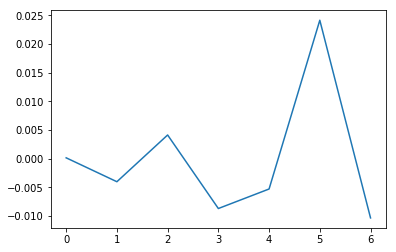

In [38]:
data_fit = model.intercept_ + data.logL*model.coef_[0] + data.logK*model.coef_[1]
Residuals = data.logQ - data_fit
plt.plot(Residuals)

In [40]:
resid = sum(pow(Residuals,2))
total = len(Y) * np.var(Y)
rsq = 1 - resid/total

adj_rsq = 1 - (1 - rsq)**2*(7-1) / (7-2-1)
adj_rsq

0.9999934951730489